# Missing Value Treatment

## Handling Missing Values in Python  

Three types of Missing data
1. missing completely at random (MCAR) 
2. Missing at random (MAR)
3. Missing not at random (MNAR) 

## Important functions to remember 
**isna  
notna  
fillna  
dropna  
interpolate  
replace**

**Let us create a sample data**

In [79]:
import pandas as pd
import numpy as np 
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],
                  columns=['one', 'two', 'three'])
df['four'] = 'bar'
df['five'] = df['one'] > 0
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2['timestamp'] = pd.Timestamp('20120101')
df2.loc[['a','c','h'],['one','timestamp']] = np.nan
df2

,one,two,three,four,five,timestamp
a,NaN,-0.608825,0.570752,bar,True,NaT
b,NaN,NaN,NaN,NaN,NaN,2012-01-01
c,NaN,-0.699504,-0.901725,bar,False,NaT
d,NaN,NaN,NaN,NaN,NaN,2012-01-01
e,-0.049112,-1.557824,0.423959,bar,False,2012-01-01
f,-0.900540,-0.958968,-0.652212,bar,False,2012-01-01
g,NaN,NaN,NaN,NaN,NaN,2012-01-01
h,NaN,3.451889,0.087654,bar,False,NaT


## Checking for missing data NAN, NAT

In [6]:
df2['one'].isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [7]:
df2['one'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

Count for missing data for every column in data frame

In [13]:
np.sum(df2.isna())

one          6
two          3
three        3
four         3
five         3
timestamp    3
dtype: int64

In [14]:
df2.describe(include = 'all')

,one,two,three,four,five,timestamp
count,2.000000,5.000000,5.000000,5,5,5
unique,NaN,NaN,NaN,1,2,1
top,NaN,NaN,NaN,bar,True,2012-01-01 00:00:00
freq,NaN,NaN,NaN,5,3,5
first,NaN,NaN,NaN,NaN,NaN,2012-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2012-01-01 00:00:00
mean,-0.368562,0.471532,-0.334167,NaN,NaN,NaN
std,0.599524,0.675267,0.883115,NaN,NaN,NaN
min,-0.792489,-0.393363,-1.107855,NaN,NaN,NaN
25%,-0.580525,-0.033746,-0.974758,NaN,NaN,NaN


## Pandas Slicing using indexing ix[ ], iloc[ ], loc[ ] 

* **.loc** is for labels and **.iloc** is for observations’ position. .ix uses both labels and positions. Avoid using ix
* **.loc** includes last element, when using an interval slice (e.g, [“a”:”c”]). **.iloc** does not include last element.
* When using a integer based index be clear with what you want and avoid confusion by appropriately selecting .loc or iloc for the task. Avoid using .ix.

In [21]:
df2.loc['b':'f'] # the last element f is included

,one,two,three,four,five,timestamp
b,NaN,NaN,NaN,NaN,NaN,2012-01-01
c,NaN,-0.033746,-0.596660,bar,True,NaT
d,NaN,NaN,NaN,NaN,NaN,2012-01-01
e,-0.792489,0.765631,1.068104,bar,False,2012-01-01
f,0.055366,1.288073,-0.974758,bar,True,2012-01-01


In [23]:
df2.iloc[1:5]  # the last index 5 is not included

,one,two,three,four,five,timestamp
b,NaN,NaN,NaN,NaN,NaN,2012-01-01
c,NaN,-0.033746,-0.596660,bar,True,NaT
d,NaN,NaN,NaN,NaN,NaN,2012-01-01
e,-0.792489,0.765631,1.068104,bar,False,2012-01-01


## Calculation with missing data
* When summing data, NA (missing) values will be treated as zero
* If the data are all NA, the result will be NA
* Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

In [26]:
df2

,one,two,three,four,five,timestamp
a,NaN,-0.393363,-1.107855,bar,True,NaT
b,NaN,NaN,NaN,NaN,NaN,2012-01-01
c,NaN,-0.033746,-0.596660,bar,True,NaT
d,NaN,NaN,NaN,NaN,NaN,2012-01-01
e,-0.792489,0.765631,1.068104,bar,False,2012-01-01
f,0.055366,1.288073,-0.974758,bar,True,2012-01-01
g,NaN,NaN,NaN,NaN,NaN,2012-01-01
h,NaN,0.731067,-0.059668,bar,False,NaT


In [25]:
df2['one']+ df2['two']

a         NaN
b         NaN
c         NaN
d         NaN
e   -0.026859
f    1.343439
g         NaN
h         NaN
dtype: float64

In [29]:
df2['one'].sum() # All NAN's are treated as zero

-0.73712312463692464

In [33]:
df2['one'].mean() # mean only takes number of values without NAN so in this case for mean denominator is 2 

-0.36856156231846232

In [35]:
df2['two'].cumsum() # resulting table in cumsum will retain NA but sum will be carried forward

a   -0.393363
b         NaN
c   -0.427109
d         NaN
e    0.338522
f    1.626595
g         NaN
h    2.357662
Name: two, dtype: float64

In [37]:
df2.groupby(['five'])['two'].sum() # NAN in groupby column are automatically removed

five
False    1.496698
True     0.860964
Name: two, dtype: float64

### Missing value treatment

### Filling missing values

In [44]:
df2['two'].fillna('missing')

a    -0.393363
b      missing
c   -0.0337456
d      missing
e     0.765631
f      1.28807
g      missing
h     0.731067
Name: two, dtype: object

In [80]:
df2.loc['f','two'] = np.nan

In [81]:
df2

,one,two,three,four,five,timestamp
a,NaN,-0.608825,0.570752,bar,True,NaT
b,NaN,NaN,NaN,NaN,NaN,2012-01-01
c,NaN,-0.699504,-0.901725,bar,False,NaT
d,NaN,NaN,NaN,NaN,NaN,2012-01-01
e,-0.049112,-1.557824,0.423959,bar,False,2012-01-01
f,-0.900540,NaN,-0.652212,bar,False,2012-01-01
g,NaN,NaN,NaN,NaN,NaN,2012-01-01
h,NaN,3.451889,0.087654,bar,False,NaT


In [57]:
#pad and ffill imputes previous value to next and limit controls number of forward fill
df2['two'].fillna(method = 'pad', limit =1) 

a   -0.393363
b   -0.393363
c   -0.033746
d   -0.033746
e    0.765631
f    0.765631
g         NaN
h    0.731067
Name: two, dtype: float64

In [64]:
df2['two'].fillna(method = 'bfill', limit =1) #fills inreverse order

a   -0.393363
b   -0.033746
c   -0.033746
d    0.765631
e    0.765631
f         NaN
g    0.731067
h    0.731067
Name: two, dtype: float64

In [84]:
df2['two'].fillna(df2.mean()['two']) #Replace with the aggregated value

a   -0.608825
b    0.146434
c   -0.699504
d    0.146434
e   -1.557824
f    0.146434
g    0.146434
h    3.451889
Name: two, dtype: float64

In [86]:
df2.fillna(df2.mean()['two':'three']) #Replace with the aggregated value for column in a range 

,one,two,three,four,five,timestamp
a,NaN,-0.608825,0.570752,bar,True,NaT
b,NaN,0.146434,-0.094314,NaN,NaN,2012-01-01
c,NaN,-0.699504,-0.901725,bar,False,NaT
d,NaN,0.146434,-0.094314,NaN,NaN,2012-01-01
e,-0.049112,-1.557824,0.423959,bar,False,2012-01-01
f,-0.900540,0.146434,-0.652212,bar,False,2012-01-01
g,NaN,0.146434,-0.094314,NaN,NaN,2012-01-01
h,NaN,3.451889,0.087654,bar,False,NaT


### Drop all NA or missing value at column or row level

In [94]:
df2['Flag'] = 'Test'
df2.dropna(axis = 1) #drops all columns with NA

,Flag
a,Test
b,Test
c,Test
d,Test
e,Test
f,Test
g,Test
h,Test


In [95]:
df2.dropna(axis = 0) #drops all rows with NA

,one,two,three,four,five,timestamp,Flag
e,-0.049112,-1.557824,0.423959,bar,False,2012-01-01,Test


### Interpolation

Pandas and series has an interpolate option that fills NA so that when plotted there is a smooth connection between points  
But if interpolate is not given any method it assumes the rows are arranged in equal interval and fills na  
But if method is specified then it takes care of the gaps wrt to index. if time wrt time of=r if values wrt values  

In [98]:
df_time = pd.DataFrame({'CumulativeSales': [120,np.nan, 450,np.nan,np.nan, 10200 ]}, 
                       index = [pd.Timestamp('2012-01-01'), pd.Timestamp('2012-03-01'),pd.Timestamp('2012-04-01'),
                                pd.Timestamp('2012-07-01'),pd.Timestamp('2012-09-01'), pd.Timestamp('2012-12-01')])
df_time

,CumulativeSales
2012-01-01,120.0
2012-03-01,NaN
2012-04-01,450.0
2012-07-01,NaN
2012-09-01,NaN
2012-12-01,10200.0


,CumulativeSales
2012-01-01,120.0
2012-03-01,285.0
2012-04-01,450.0
2012-07-01,3700.0
2012-09-01,6950.0
2012-12-01,10200.0


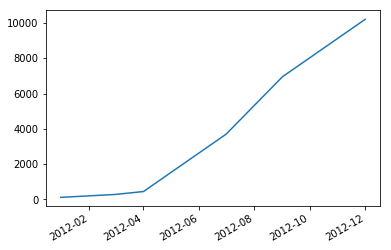

In [103]:
df_time.interpolate()['CumulativeSales'].plot()
df_time.interpolate() #here it just inserts average of value around missing vlaue

,CumulativeSales
1,120.00
3,340.00
4,450.00
7,4106.25
9,6543.75
12,10200.00


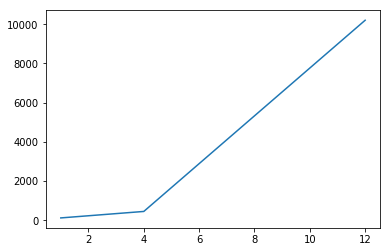

In [108]:
#similarly if interpolation required by index which is values use method = values
df_values = pd.DataFrame({'CumulativeSales': [120,np.nan, 450,np.nan,np.nan, 10200 ]}, 
                       index = [1,3,4,7,9,12])
df_values
df_values.interpolate(method= 'values')['CumulativeSales'].plot() #since it is fit wrt to index there is perect linear trend
df_values.interpolate(method= 'values')

### Replace

In [110]:
ser = pd.Series([8., 9., 10., 17., 23.])
ser

0     8.0
1     9.0
2    10.0
3    17.0
4    23.0
dtype: float64

In [112]:
ser.replace(17,200)

0      8.0
1      9.0
2     10.0
3    200.0
4     23.0
dtype: float64

In [115]:
ser.replace([8,23],[200,205])

0    200.0
1      9.0
2     10.0
3     17.0
4    205.0
dtype: float64

In [116]:
ser.replace( {8:200, 23:205})

0    200.0
1      9.0
2     10.0
3     17.0
4    205.0
dtype: float64

In [119]:
df = pd.DataFrame({'a': [0, 34, 54, 765, 800], 'b': [626, 65, 7, 89, 97]})
df

,a,b
0,0,626
1,34,65
2,54,7
3,765,89
4,800,97


In [138]:
df.replace({'a': 0, 'b': 89}, {'a':100,'b':2000}) # replacing each columns specified values with respective  values

,a,b
0,100,626
1,34,65
2,54,7
3,765,2000
4,800,97


In [137]:
df.replace({'a': 0, 'b': 89}, 10000) # replacing across columns specified values with on values

,a,b
0,10000,626
1,34,65
2,54,7
3,765,10000
4,800,97


In [136]:
df['a'].replace([54,800], method = 'pad')  # all provided values get padded by previous values

0      0
1     34
2     34
3    765
4    765
Name: a, dtype: int64

Using replace for text along with regex

In [143]:
df = pd.DataFrame({'a': list(range(4)), 'b': ['a','b','.','a.b'], 'c': ['a', 'b', np.nan, 'd']})
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,a.b,d


In [145]:
df.replace(r'\s*\.\s*', np.nan, regex=True) #this how we can use regex for text replacement

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [162]:
df.replace('.', np.nan)  #direct search and replace without regex 

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,a.b,d


In [163]:
df.replace(['a','.'], np.nan)  # replace more than one value with one specific values

,a,b,c
0,0,NaN,NaN
1,1,b,b
2,2,NaN,NaN
3,3,a.b,d


In [165]:
df.replace({ 'a':1,'b':'.'}, np.nan) # replace specific columns' specific value with a value

,a,b,c
0,0.0,a,a
1,NaN,b,b
2,2.0,NaN,NaN
3,3.0,a.b,d


In [166]:
df.replace({ 'a':1,'b':'.'}, {'a': 5, 'b':np.nan}) # respective column replace respective values

,a,b,c
0,0,a,a
1,5,b,b
2,2,NaN,NaN
3,3,a.b,d


In [167]:
df.replace(regex={'b': {r'\s*\.\s*': np.nan}}) # instead of two spereate dictionary you can do nested dictionaries aswell

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


**Note** While pandas supports storing arrays of integer and boolean type, these types are not capable of storing missing data

# Quick text data munging in python

For text data some good functions  
**str.strip, str.lstrip, str.rstrip,  
str.lower  
str.replace  
str[0]   #for indexing  
str.extract , str.extractall  
str.contains  
str.match  
str.get_dummies  
** 

In [205]:
s = pd.Series(['A1A123', 'B25', 'C999', 'krit', 'xyz', np.nan,
               'PQRS', 'd9d5', 'murt3'])
s

0    A1A123
1       B25
2      C999
3      krit
4       xyz
5       NaN
6      PQRS
7      d9d5
8     murt3
dtype: object

In [206]:
s.str[0] # for indexxing text inside a cell

0      A
1      B
2      C
3      k
4      x
5    NaN
6      P
7      d
8      m
dtype: object

In [207]:
s.str.extract('(?P<letter>[ABt])(?P<digit>\d)', expand=True) #search and extract to create a column with a column name
# expand = False gives dataframe and True gives seriec

,letter,digit
0,A,1
1,B,2
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,t,3


In [208]:
s.str.extract('([ABd])(\d)', expand=False) #this is creating two columns so will become dataframe, look nextone

,0,1
0,A,1
1,B,2
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,d,9
8,NaN,NaN


In [209]:
s.str.extract('[ABd](\d)', expand=False) #one small tweak makes it create one column and since expand = False becomes series

0      1
1      2
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7      9
8    NaN
dtype: object

In [202]:
s.str.extract('[ABd](\d)', expand=True) #Exact same as above but when expand = True becomes dataframe

,0
0,1
1,2
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,9
8,NaN


In [211]:
# simialr to extract, extractall returnsevery match not just the first match
s.str.extractall('[ABd](\d)') 

0
  match   
0 0      1
  1      1
1 0      2
7 0      9
  1      5

In [217]:
#check whether string contains a string
s4 = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s4.str.contains('A')

0     True
1    False
2    False
3     True
4    False
5      NaN
6     True
7    False
8    False
dtype: object

In [214]:
s4.str.contains('A', na = False) #handles NA aswell

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
dtype: bool

In [216]:
s4.str.match('Aa') #Match Finds substring within a string

0    False
1    False
2    False
3     True
4    False
5      NaN
6    False
7    False
8    False
dtype: object

# Outlier Treatment 
### Here we will also try basic plotting, scaling,and PCA aswell

Good link : https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/

Outliers handling
1. **Extreme Value Analysis:** Simple univariate analysis, plots, percentile distributions
2. **Proximity Methods:** Use clustering methods to identify the natural clusters in the data (such as the k-means algorithm).Identify and mark the cluster centroids. Identify data instances that are a fixed distance or percentage distance from cluster centroids. Filter out outliers candidate from training dataset and assess your models performance
3. **Projection Methods:** Use projection methods to summarize your data to two dimensions (such as PCA, SOM or Sammon’s mapping).Visualize the mapping and identify outliers by hand

Here we will focus on EXTREME VALUE ANALYSIS 

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

In [337]:
iris = pd.read_csv('C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\MachineLearning_Python-R-Tableau\\imagesanddata_backupfiles\\iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


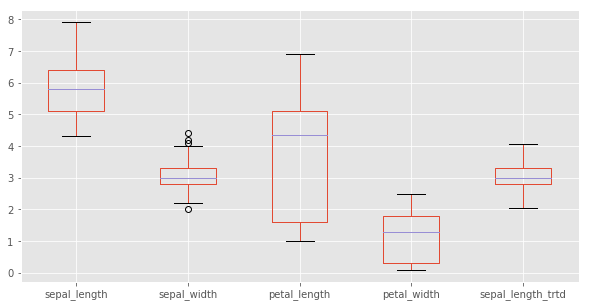

In [342]:
iris.boxplot()
plt.show()

Sepal Width has some outliers

0.00    2.00
0.10    2.50
0.25    2.80
0.50    3.00
0.75    3.30
0.90    3.61
1.00    4.40
Name: sepal_width, dtype: float64


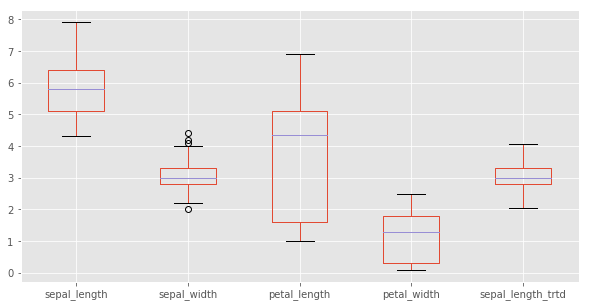

In [343]:
print(iris['sepal_width'].quantile([.0,.1,.25,.5,.75,.9,1]) )

#now let us treat all the values outside 1.5* IQR with 1.5*IQR
Q3 = iris['sepal_width'].quantile(.75) 
Q1 = iris['sepal_width'].quantile(.25)
IQR =  (Q3 - Q1)

iris['sepal_length_trtd'] = np.where(iris['sepal_width'] < Q1 -(IQR*1.5), Q1 -(IQR*1.5),
                                 np.where(iris['sepal_width'] > Q3 +(IQR*1.5),Q3 +(IQR*1.5),
                                         iris['sepal_width']))
iris.boxplot()

# Other basic python data munging functions

Top 10 List
1. Scaling
    * sk.preprocessing.StandardScaler()
    * sk.preprocessing.MinMaxScaler()
    * sk.preprocessing.MaxAbsScaler()
2. PCA
    * sl.decomposition.PCA()
3. Data Transposing
    * pivot_table()
4. rank()
5. rolling()
6. sample()
7. Label Encoding 
    * pd.factorize()
    * sk.preprocessing.LabelEncoder()
8. Dummy variable creation
    * pd.get_dummies()
    * sk.preprocessing.OneHotEncoder()
9. Bucketing
    * pd.cut()
10. pd.corr()

**Scaling**
* standard scaling (Z score sclaing)
* min max scaling (range will be [0,1])
* max abs scaling (range will be [-1,1]) #prefered for sparse data or data that is centered at 0 

In [346]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
iris['sepal_len_standard_scaling'] = scaler.fit_transform(iris[['sepal_length']])
scaler = preprocessing.MinMaxScaler()
iris['sepal_len_minmax_scaling'] = scaler.fit_transform(iris[['sepal_length']])
scaler = preprocessing.MaxAbsScaler()
iris['sepal_len_maxabs_scaling'] = scaler.fit_transform(iris[['sepal_length']])

iris[['sepal_length','sepal_len_standard_scaling','sepal_len_minmax_scaling','sepal_len_maxabs_scaling']].describe()

,sepal_length,sepal_len_standard_scaling,sepal_len_minmax_scaling,sepal_len_maxabs_scaling
count,150.000000,1.500000e+02,150.000000,150.000000
mean,5.843333,-4.736952e-16,0.428704,0.739662
std,0.828066,1.003350e+00,0.230018,0.104818
min,4.300000,-1.870024e+00,0.000000,0.544304
25%,5.100000,-9.006812e-01,0.222222,0.645570
50%,5.800000,-5.250608e-02,0.416667,0.734177
75%,6.400000,6.745011e-01,0.583333,0.810127
max,7.900000,2.492019e+00,1.000000,1.000000


**PCA Principal component analysis**

In [361]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(iris.drop('species', axis =1))
variance_captured_byeachPC = pca.explained_variance_ratio_

print('Variance capture by top2 components')
print(variance_captured_byeachPC)

pca_data[0:5]


Variance capture by top2 components
[ 0.88446852  0.08692044]


array([[-2.84228737,  0.54478168],
       [-2.95024825, -0.1595661 ],
       [-3.22768145, -0.12546198],
       [-3.14747283, -0.38500104],
       [-2.94250294,  0.54701974]])

**Pivot**

In [363]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                          "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                          "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                          "small", "large", "small", "small",
                          "large"],
                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [367]:
df.pivot_table(index = ['A'], columns = ['C'], values = 'D', aggfunc = 'mean')

C,large,small
A,,
bar,5.5,5.500000
foo,2.0,2.333333


In [366]:
df.pivot_table(index = ['A','B'], columns = ['C'], values = 'D')

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    2.0    1.0
    two    NaN    3.0

**Ranking**

In [399]:
df = pd.DataFrame({
'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
'History','History','History','Economics','Economics','Economics'],
'Score':[62,47,55,74,31,77,85,63,42,62,89,85]})
df

,Name,Score,Subject
0,Alisa,62,Mathematics
1,Bobby,47,Mathematics
2,Cathrine,55,Mathematics
3,Alisa,74,Science
4,Bobby,31,Science
5,Cathrine,77,Science
6,Alisa,85,History
7,Bobby,63,History
8,Cathrine,42,History
9,Alisa,62,Economics


In [411]:
df['score_ranked'] = df['Score'].rank(ascending = True, na_option = 'bottom') #default method is average
df

,Name,Score,Subject,score_ranked
0,Alisa,62,Mathematics,5.5
1,Bobby,47,Mathematics,3.0
2,Cathrine,55,Mathematics,4.0
3,Alisa,74,Science,8.0
4,Bobby,31,Science,1.0
5,Cathrine,77,Science,9.0
6,Alisa,85,History,10.5
7,Bobby,63,History,7.0
8,Cathrine,42,History,2.0
9,Alisa,62,Economics,5.5


In [408]:
df['score_ranked'] = df['Score'].rank(ascending = True, na_option = 'bottom', method = 'min')
df

,Name,Score,Subject,score_ranked
0,Alisa,62,Mathematics,5.0
1,Bobby,47,Mathematics,3.0
2,Cathrine,55,Mathematics,4.0
3,Alisa,74,Science,8.0
4,Bobby,31,Science,1.0
5,Cathrine,77,Science,9.0
6,Alisa,85,History,10.0
7,Bobby,63,History,7.0
8,Cathrine,42,History,2.0
9,Alisa,62,Economics,5.0


In [409]:
df['score_ranked'] = df['Score'].rank(ascending = True, na_option = 'bottom', method = 'max')
df

,Name,Score,Subject,score_ranked
0,Alisa,62,Mathematics,6.0
1,Bobby,47,Mathematics,3.0
2,Cathrine,55,Mathematics,4.0
3,Alisa,74,Science,8.0
4,Bobby,31,Science,1.0
5,Cathrine,77,Science,9.0
6,Alisa,85,History,11.0
7,Bobby,63,History,7.0
8,Cathrine,42,History,2.0
9,Alisa,62,Economics,6.0


In [412]:
df['score_ranked'] = df['Score'].rank(ascending = True, na_option = 'bottom', method = 'dense')
df

,Name,Score,Subject,score_ranked
0,Alisa,62,Mathematics,5.0
1,Bobby,47,Mathematics,3.0
2,Cathrine,55,Mathematics,4.0
3,Alisa,74,Science,7.0
4,Bobby,31,Science,1.0
5,Cathrine,77,Science,8.0
6,Alisa,85,History,9.0
7,Bobby,63,History,6.0
8,Cathrine,42,History,2.0
9,Alisa,62,Economics,5.0


In [414]:
df['score_ranked'] = df['Score'].rank(ascending = True, na_option = 'bottom', method = 'first')
df

,Name,Score,Subject,score_ranked
0,Alisa,62,Mathematics,5.0
1,Bobby,47,Mathematics,3.0
2,Cathrine,55,Mathematics,4.0
3,Alisa,74,Science,8.0
4,Bobby,31,Science,1.0
5,Cathrine,77,Science,9.0
6,Alisa,85,History,10.0
7,Bobby,63,History,7.0
8,Cathrine,42,History,2.0
9,Alisa,62,Economics,6.0


In [416]:
df['score_ranked'] = df['Score'].rank(ascending = True, na_option = 'bottom', method = 'first', pct = True)
df

,Name,Score,Subject,score_ranked
0,Alisa,62,Mathematics,0.416667
1,Bobby,47,Mathematics,0.250000
2,Cathrine,55,Mathematics,0.333333
3,Alisa,74,Science,0.666667
4,Bobby,31,Science,0.083333
5,Cathrine,77,Science,0.750000
6,Alisa,85,History,0.833333
7,Bobby,63,History,0.583333
8,Cathrine,42,History,0.166667
9,Alisa,62,Economics,0.500000


**Rolling**

In [371]:
df = pd.DataFrame({'B': [7,5,5, 3,7, np.nan, np.nan,np.nan, np.nan, 4,6]})
df

,B
0,7.0
1,5.0
2,5.0
3,3.0
4,7.0
5,NaN
6,NaN
7,NaN
8,NaN
9,4.0


In [373]:
df.rolling(window = 3, min_periods = 2).mean() 

,B
0,NaN
1,6.000000
2,5.666667
3,4.333333
4,5.000000
5,5.000000
6,NaN
7,NaN
8,NaN
9,NaN


**Sampling**  
sample

In [286]:
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_trtd
110,6.5,3.2,5.1,2.0,virginica,3.2
23,5.1,3.3,1.7,0.5,setosa,3.3
86,6.7,3.1,4.7,1.5,versicolor,3.1


**Label encoding**  
In pandas : pd.factorize()  
In Scikitlearn: sk.preprocessing.LabelEncoder()  

In [291]:
from sklearn import preprocessing
import pandas as pd

iris['species'].factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

In [308]:
le = preprocessing.LabelEncoder()
le.fit_transform(iris['species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

**Convert Categorical variable into dummy numeric variables**

In [302]:
pd.get_dummies(iris['species']).head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [314]:
le = preprocessing.LabelEncoder()
iris['species_labelencoded'] = le.fit_transform(iris['species'])
ohe = preprocessing.OneHotEncoder()
pd.DataFrame(ohe.fit_transform(iris[['species_labelencoded']]).toarray()).head()

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


**Bucketing**   
cut

In [317]:
df = pd.DataFrame({'days': [0,20,30,31,45,60]})

df['range1'] = pd.cut(df.days, [0,30,60], include_lowest=True) #includes lowest term
df['range2'] = pd.cut(df.days, [0,30,60], right=False) #excludes rightmost term
df['range3'] = pd.cut(df.days, [0,30,60]) # excludes lowermost and includes right most by default
print (df)

   days          range1    range2    range3
0     0  (-0.001, 30.0]   [0, 30)       NaN
1    20  (-0.001, 30.0]   [0, 30)   (0, 30]
2    30  (-0.001, 30.0]  [30, 60)   (0, 30]
3    31    (30.0, 60.0]  [30, 60)  (30, 60]
4    45    (30.0, 60.0]  [30, 60)  (30, 60]
5    60    (30.0, 60.0]       NaN  (30, 60]


**correlation**

In [323]:
corrmatrix = iris.corr()
corrmatrix

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_trtd,species_labelencoded
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.110343,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.997590,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.419823,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.355582,0.956464
sepal_length_trtd,-0.110343,0.997590,-0.419823,-0.355582,1.000000,-0.419264
species_labelencoded,0.782561,-0.419446,0.949043,0.956464,-0.419264,1.000000


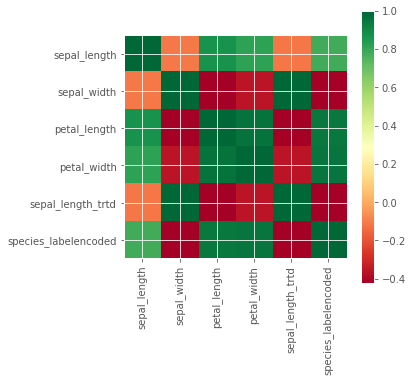

In [324]:
plt.rcParams['figure.figsize'] = (5,5)
plt.imshow(corrmatrix, cmap = 'RdYlGn')
plt.colorbar()
# plt.title('logins_count highly correlated with count_of_events, \n club_id_count,& quantity_sum')
plt.xticks(np.arange(corrmatrix.shape[0]),corrmatrix.columns, rotation = 90)
plt.yticks(np.arange(corrmatrix.shape[0]),corrmatrix.columns)
plt.show()
